<a href="https://colab.research.google.com/github/MonikaLamba/Reinforcement-Learning/blob/main/THOMPSON_SAMPLING_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv("Ads_Optimisation.csv")

In [3]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
df.tail()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


In [5]:
df.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [6]:
df.tail(15)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9985,0,0,0,0,0,0,0,1,0,0
9986,0,0,0,0,1,0,0,0,0,0
9987,0,0,0,0,1,0,0,0,0,0
9988,1,0,0,0,1,0,0,0,0,0
9989,0,0,0,0,0,0,0,0,0,0
9990,0,0,0,1,0,0,0,0,0,0
9991,0,1,0,1,1,0,1,0,0,0
9992,0,0,0,1,0,0,1,0,0,0
9993,0,0,0,0,1,0,0,0,1,0
9994,0,0,1,0,0,0,0,0,1,0


In [7]:
df.shape

(10000, 10)

In [8]:
##import random

N = df.shape[0]
d = df.shape[1]

In [ ]:
N = df.shape[0]
d = df.shape[1]

total_reward = 0
chosen_ads = []
ones = [0]* d
zeros = [0] * d
#d = 10  # there are 10 ads type in total
# Ni⁰(n) -> the number of times '1' arrives so far
# Ni¹(n) -> the number of times '0' arrives so far
#total_reward = 0 # sum of rewards
#chosen_ads = []  # an empty list created for choosed ads
#ones = [0] * a   # '1' as a reward from each ad
#zeros = [0] * a  # '0' as a reward from each ad


In [ ]:
[0]* d

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
[2]*d

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [17]:
#Thompson Sampling

N = 10000 # 10.000 users
a = 10  # there are 10 ads type in total
# Ni⁰(n) -> the number of times '1' arrives so far
# Ni¹(n) -> the number of times '1' arrives so far
total_reward = 0 # sum of rewards
chosen_ads = []  # an empty list created for choosed ads
ones = [0] * a   # '1' as a reward from each ad
zeros = [0] * a  # '0' as a reward from each ad
for n in range(1,N): # Outer loop that allows us to navigate rows
    chosen_ad = 0 
    max_beta = 0
    for i in range(0,a): # Inner loop that allows us to navigate columns
        random_beta = random.betavariate (ones[i] +1 , zeros[i] +1) # Creating random beta by giving α(alpha) and β values
        if random_beta > max_beta:
            max_beta = random_beta # Max_beta is constantly updated, if a value greater than itself, it changes.
            chosen_ad = i  # We add which ad we clicked for each line to the selected ads
    chosen_ads.append(chosen_ad) # We add whichever ad we choose in each row to the selected ads list
    reward = df.values[n,chosen_ad] # If n. chosed ad data in row=1, reward=1. otherwise 0
    # reward = df.iloc[n, chosen_ad]
    if reward == 1:
        ones[chosen_ad] = ones[chosen_ad]+1 # When the reward is 1, increase the reward of the corresponding ad by 1.
    else :
        zeros[chosen_ad] = zeros[chosen_ad] + 1 # When the reward is 1, increase the value of the corresponding ad in the ones list by 1.
    total_reward = total_reward + reward  # Add the reward resulting from the operation performed on each row of the dataset to the total reward.
    
print('\033[1m' + f'Total Reward: {total_reward}') 

Total Reward: 2571


In [18]:
print(total_reward)

2571


In [20]:
true_clicks = []
for i in range(0,10):
    true_clicks.append(sum(df.iloc[:,i:i+1].values))
    
true_clicks = [int(item) for item in true_clicks]
    
true_clicks_array = np.array(true_clicks)
true_clicks_array = true_clicks_array.reshape(1,10)

true_clicks_df = pd.DataFrame(data=true_clicks_array, columns=df.columns, index=['Total True Clicks'])
true_clicks_df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
Total True Clicks,1703,1295,728,1196,2695,126,1112,2091,952,489


In [23]:
max_ad_click = true_clicks_df.values.max()
max_ad_click
max_ad_click_name = true_clicks_df.idxmax(axis=1)[0]
max_ad_click_name

'Ad 5'

In [ ]:
max_ad_click = true_clicks_df.values.max()
max_ad_click_name = true_clicks_df.idxmax(axis=1)[0]

sum_of_clicks=0
for i in range(1,10):
    sum_of_clicks = sum_of_clicks + true_clicks_df.values[0][i]
    
ratio = max_ad_click/sum_of_clicks

print(f'Sum of clicks                   : {sum_of_clicks}')
print(f'The name of the most clicked ad : {max_ad_click_name}')
print(f'The ratio of {max_ad_click_name} to all clicks : {ratio:.2f}\n')

Sum of clicks                   : 10684
The name of the most clicked ad : Ad 5
The ratio of Ad 5 to all clicks : 0.25



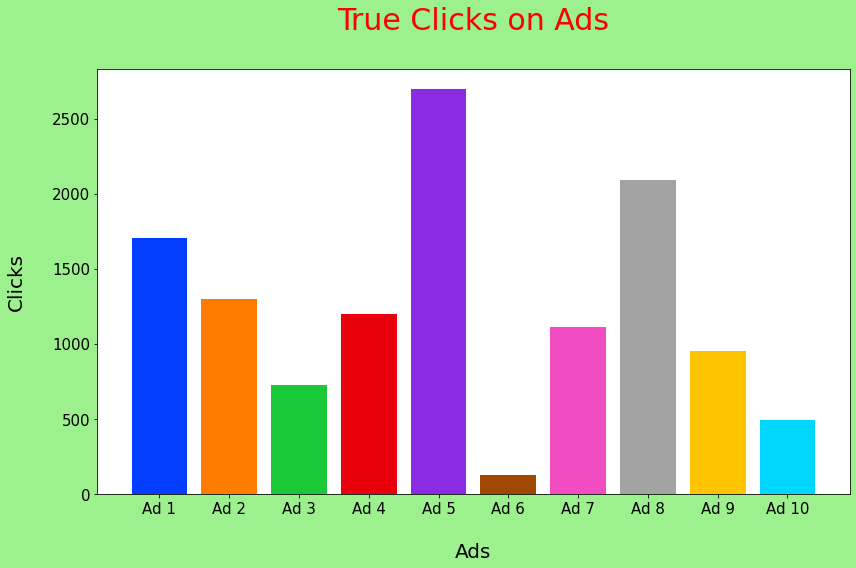

In [ ]:
plt.figure(figsize = (12,8), facecolor='#9DF08E')
plt.bar(x=df.columns, height=true_clicks, color=sns.color_palette('bright'))
plt.title('True Clicks on Ads\n', fontsize=30, color='red')
plt.xlabel('\nAds', fontsize=20, color='black')
plt.ylabel('Clicks\n', fontsize=20, color='black')
plt.xticks(horizontalalignment='center', fontsize='15', color='black')
plt.yticks(fontsize='15', color='black')
plt.tight_layout()
plt.show()

In [ ]:
# Chosens of Thompson Sampling

number_of_chosens = []
for i in range(0,10):
    number_of_chosens.append(chosen_ads.count(i))
    
number_of_chosens_arr = np.array(number_of_chosens)
number_of_chosens_arr = number_of_chosens_arr.reshape(1,10)

number_of_chosens_df = pd.DataFrame(data=number_of_chosens_arr, columns=df.columns, index=['Number of Chosens'])
number_of_chosens_df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
Number of Chosens,47,81,38,132,9000,36,81,497,39,48


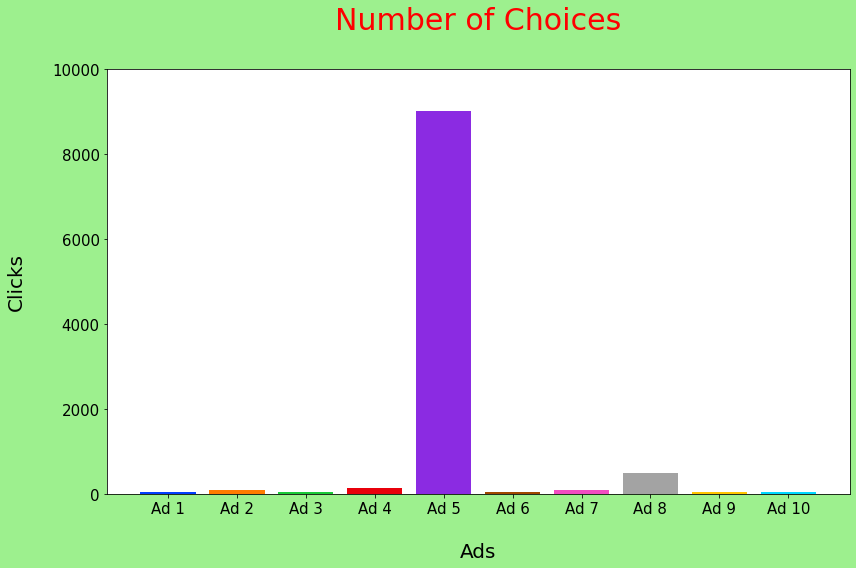

In [ ]:
plt.figure(figsize = (12,8),facecolor='#9DF08E')
plt.bar(x=df.columns, height=number_of_chosens, color=sns.color_palette('bright'))
plt.title('Number of Choices\n', fontsize=30, color='red')
plt.xlabel('\nAds', fontsize=20, color='black')
plt.ylabel('Clicks\n', fontsize=20, color='black')
plt.xticks(horizontalalignment='center', fontsize='15', color='black')
plt.yticks(np.arange(0,10001,2000),fontsize='15', color='black')
plt.tight_layout()
plt.show()

In [ ]:
print('\033[1m' + f'Total Reward: {total_reward}')  


Total Reward: 2577
